# Assignment 6 Solutions <img style = "position:absolute; TOP:0px; LEFT:840px; WIDTH:250px; HEIGHT:65px"  src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


## Assignment 6

1. Definition reminder: given a time-series data set, with an $N$-period moving average $\mu_N$ and an $N$-period standard deviation $\sigma_N$, the *K-Upper Bollinger Bands* are defined as the rolling computation $(\mu_N + K\sigma_N)$ for some $K=1,2,\ldots$. Similarly, the *K-Lower Bollinger Bands* are $(\mu_N - K\sigma_N)$.  Load in the `timeseries_1.csv` price series, and create two new columns which are the first upper and lower Bollinger bands on a 4-minute level computed on the *open* price.  Create another column which has `True` if the high of any given minute is above the upper Bollinger band value, and `False` if not.
2. Consider the following set of data:<br>
`[ 31.64318274,  52.38028382,  52.06990842,  49.38683521, 66.2809943,  56.28673623,  56.31535831,  47.61107798, 51.22059076,  72.74444307,  44.92132396,  44.7806115 ,55.06875272,  53.30195541,  48.82836245,  56.5645093 ,58.60658527,  51.25941697,  31.19829968,  71.44567964,  50.90570844,  41.50918145,  46.12808914,  38.29642645, 74.76853757,  56.09746354,  49.40810407,  41.91971301,  59.79453349,  71.42976646,  84.08722246,  66.11230252, 52.09783487,  66.50079773,  47.23055517,  42.41625807,  34.99316584,  39.61756471,  51.67965582,  57.67403776, 60.54283988,  40.30238293,  46.61520191,  55.6952267 ,  43.87997719,  45.23675992,  59.35864021,  31.31812861, 74.5603146 , 62.91095588]`<br>
Use the Interquartile Method to find any possible outliers.  If there are any outliers, how many standard deviations away from the mean are they?
3. Load up the file `cordf.csv` file to answer these questions.
  1.  Create a correlation matrix to describe how the variables in this file are correlated to each other. Which pair of columns is the most correlated? Which is the least? Note the ambiguity in this question: what does it mean for one pair to be "more correlated" than another?
  2.  Create 5 scatterplots with the variable U on the x-axis in each, and the rest of the variables on the y-axes. Describe the relationship between the variables in each scatterplot. Compare and contrast your findings with the expectations you formed in question 1. Note: pandas has a cool function in pandas.plotting.scattermatrix that can do this kind of thing really fast. Make all the scatterplots by hand this time around, but play around with scattermatrix too when you're done to see how it works. Check out the docs here: http://pandas.pydata.org/pandas-docs/stable/visualization.html?highlight=color#scatter-matrix-plot
  3.  Taking what you find in parts 1 and 2 together, what can you surmise about what exactly is measured by the correlation coefficient? What do you think you can say about the relationship between two variables if the correlation coefficient is close to 1? Close to -1? Close to 0?
  4.  Are there transformations that you could apply to any of the variables V, W, X, Y, or Z such that the transformed variables would have a higher correlation with U? Why or why not? <br>
4. Consider the data set <br>
`dfcl = pd.DataFrame({'CL Price': [35, 63, 48, 46, 66, 65, 35, 65, 50, 68, 43, 57, 39, 35, 68, 95, 56, 50, 42, 38, 47, 42, 39, 44, 52, 68, 49, 34, 39, 59, 60, 60, 60, 63, 58, 38, 37, 33, 36, 64, 38, 51, 60, 62, 65, 43, 38, 41, 48, 61]}`.<br>
Are there any values more than 3 standard deviations away from the mean? If so, can we conclude they are outliers? <br>
2.  1.  You flip a coin $n$ times and it comes up heads on each flip. Use the hypothesis testing framework to create a statistical test that will allow you to decide if the coin is biased. How big does $n$ need to be in order to decide that the evidence is significant evidence that the coin is biased? (The ambiguity here is intentional: what does it mean for evidence to be significant?)
   2.   You flip another coin $n$ times and it comes up tails 48% of the time. Use the hypothesis testing to create a statistical test that will allow you to decide if the coin is biased. How big does $n$ need to be for significance? [<em>Important hints for this one</em>. Computing exact p-values like we did in question 1 will probably be infeasible here (why?), so we'll need to use a different method. Notice that we can compute the proportion of tails that come up by encoding the flips with a 1 for tails and 0 for heads, and taking the <em>mean</em> of that. Since the proportion of tails is computed as a <em>sample mean</em>, we get to use the central limit theorem, which says that the proportion of tails (approximately) follows a normal distribution with mean equal to the true mean, and standard deviation equal to the true standard deviation divided by $\sqrt{n}$].
   3.  Based on your answers from 1 and 2, what can you say about the relationship between sample size and statistical significance?
5. (Bonus) Part of the definition of a vector space (see the appendix if you're interested) is that every vector space must have what is called an *identity* element.  The property this satisfies is that if you add the identity to any other vector, you get that other vector back again, unchanged.  For $\mathbb{R}^n$, what would the indentity element be?  Prove it in general. <br>
5. (Bonus) Using the definitions we have provided for conditional probability, derive Bayes' Theorem.


# 1.

In [2]:
ts = pd.read_csv('timeseries_1.csv', index_col=0, parse_dates=True);
ts.head()

,open,high,low,close,volume
2014-02-01 08:00:00,748.1,748.2,746.7,746.8,39470
2014-02-01 08:01:00,746.9,747.1,746.8,746.8,10498
2014-02-01 08:02:00,746.8,747.2,746.7,747.1,7782
2014-02-01 08:03:00,747.2,747.8,747.1,747.6,10678
2014-02-01 08:04:00,747.5,747.8,747.5,747.8,3194


In [3]:
ts['4min MA'] = ts['open'].rolling(window=4).mean()
ts['4min SD'] = ts['open'].rolling(window=4).std()
ts.head()

,open,high,low,close,volume,4min MA,4min SD
2014-02-01 08:00:00,748.1,748.2,746.7,746.8,39470,NaN,NaN
2014-02-01 08:01:00,746.9,747.1,746.8,746.8,10498,NaN,NaN
2014-02-01 08:02:00,746.8,747.2,746.7,747.1,7782,NaN,NaN
2014-02-01 08:03:00,747.2,747.8,747.1,747.6,10678,747.25,0.591608
2014-02-01 08:04:00,747.5,747.8,747.5,747.8,3194,747.10,0.316228


In [4]:
ts['Upper Bolinger'] = ts['4min MA']+ts['4min SD']
ts['Lower Bolinger'] = ts['4min MA']-ts['4min SD']
ts.drop(['4min MA'], axis = 1, inplace = True)
ts.drop(['4min SD'], axis = 1, inplace = True)
ts.head()

,open,high,low,close,volume,Upper Bolinger,Lower Bolinger
2014-02-01 08:00:00,748.1,748.2,746.7,746.8,39470,NaN,NaN
2014-02-01 08:01:00,746.9,747.1,746.8,746.8,10498,NaN,NaN
2014-02-01 08:02:00,746.8,747.2,746.7,747.1,7782,NaN,NaN
2014-02-01 08:03:00,747.2,747.8,747.1,747.6,10678,747.841608,746.658392
2014-02-01 08:04:00,747.5,747.8,747.5,747.8,3194,747.416228,746.783772


In [5]:
ts['Signal'] = np.where(ts['Upper Bolinger']<ts['high'],True,False)

In [6]:
ts

,open,high,low,close,volume,Upper Bolinger,Lower Bolinger,Signal
2014-02-01 08:00:00,748.1,748.2,746.7,746.8,39470,NaN,NaN,False
2014-02-01 08:01:00,746.9,747.1,746.8,746.8,10498,NaN,NaN,False
2014-02-01 08:02:00,746.8,747.2,746.7,747.1,7782,NaN,NaN,False
2014-02-01 08:03:00,747.2,747.8,747.1,747.6,10678,747.841608,746.658392,False
2014-02-01 08:04:00,747.5,747.8,747.5,747.8,3194,747.416228,746.783772,True
2014-02-01 08:05:00,747.7,747.8,747.6,747.6,2274,747.691578,746.908422,True
2014-02-01 08:06:00,747.6,747.8,747.6,747.6,2206,747.716025,747.283975,True
2014-02-01 08:07:00,747.6,747.7,747.2,747.2,3890,747.681650,747.518350,True
2014-02-01 08:08:00,747.2,747.5,747.2,747.2,4086,747.746736,747.303264,False
2014-02-01 08:09:00,747.3,747.4,747.2,747.3,2830,747.631155,747.218845,False


# 2.

In [7]:
data = pd.Series([ 31.64318274,  52.38028382,  52.06990842,  49.38683521, 66.2809943,  56.28673623,  56.31535831,  47.61107798, 
        51.22059076,  72.74444307,  44.92132396,  44.7806115 ,55.06875272,  53.30195541,  48.82836245,  56.5645093 ,
        58.60658527,  51.25941697,  31.19829968,  71.44567964,  50.90570844,  41.50918145,  46.12808914,  38.29642645, 
        74.76853757,  56.09746354,  49.40810407,  41.91971301,  59.79453349,  71.42976646,  84.08722246,  66.11230252, 
        52.09783487,  66.50079773,  47.23055517,  42.41625807,  34.99316584,  39.61756471,  51.67965582,  57.67403776, 
        60.54283988,  40.30238293,  46.61520191,  55.6952267 ,  43.87997719,  45.23675992,  59.35864021,  31.31812861, 
        74.5603146 , 62.91095588])

In [8]:
IQR = data.quantile(0.75) - data.quantile(0.25)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

In [9]:
data[(data < Q1 - 1.5*IQR ) | ( data > Q3 + 1.5*IQR)]

30    84.087222
dtype: float64

So the only possible outlier is 84.087222.  We can figure out how many standard deviations from the mean it is:

In [10]:
data.mean() + 2*data.std()

76.78606863880533

In [11]:
data.mean() + 3*data.std()

88.72908041680799

So it is between 2 and 3 standard deviations from the mean.

# 3. A.

In [13]:
cordf = pd.read_csv("cordf.csv")

# Correlation matrix
cordf.corr()

,U,V,W,X,Y,Z
U,1.000000,-0.017595,-0.888213,0.000520,0.627311,0.342996
V,-0.017595,1.000000,0.006217,0.008271,-0.001050,-0.025472
W,-0.888213,0.006217,1.000000,-0.000237,-0.570783,-0.306872
X,0.000520,0.008271,-0.000237,1.000000,-0.009350,0.508597
Y,0.627311,-0.001050,-0.570783,-0.009350,1.000000,0.181291
Z,0.342996,-0.025472,-0.306872,0.508597,0.181291,1.000000


The most tightly correlated variables are U and W, followed by U and Y and then Y and W. Note that there is some transitivity here: we know U and W are correlated, and U and Y are correlated, so W and Y also end up being correlated.

The least correlated variables are U and X, and the correlations are small (in absolute value) for U,V and V,W, and V,X as well.

When we talk about how much variables are correlated, we should really be referring to the absolute values. Variables are perfectly correlated when their correlation coefficients are 1 or -1, and uncorrelated when their correlation coefficient is 0. The sign indicates the direction of the relationship.

# 3.B.

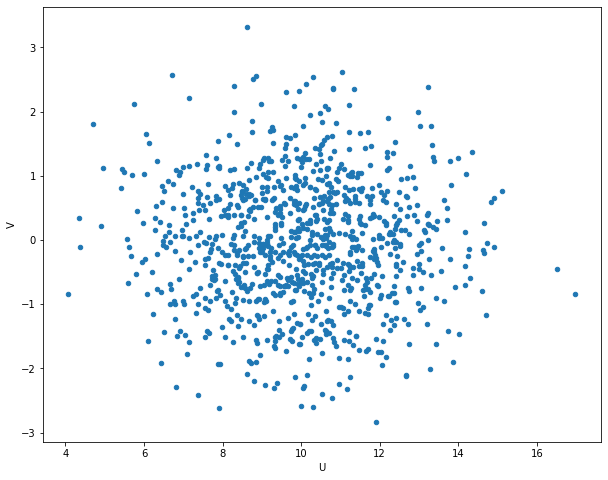

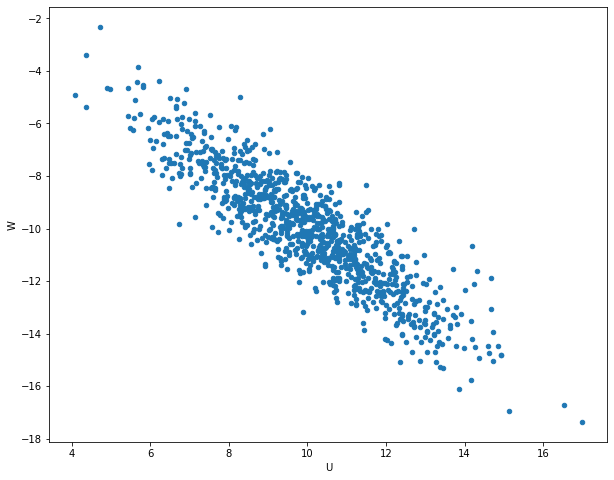

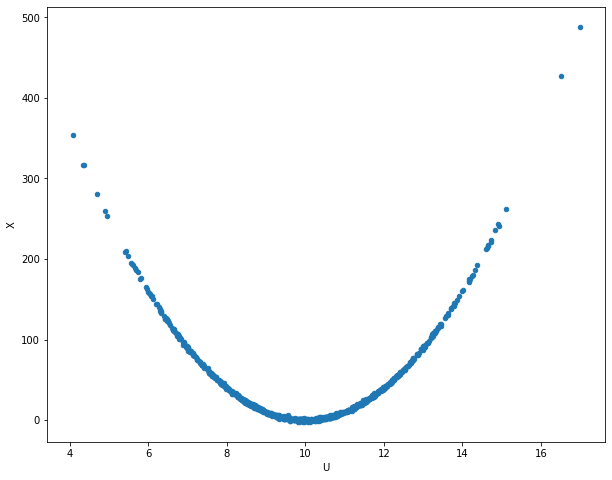

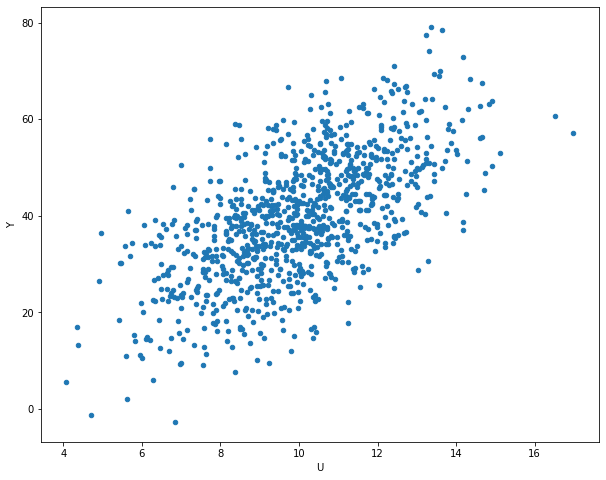

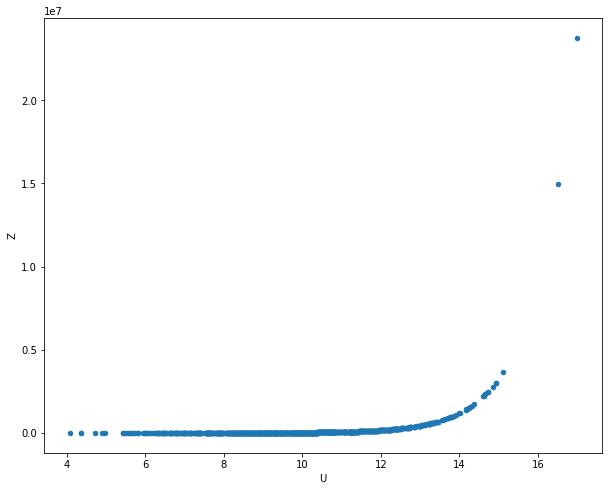

In [14]:
cordf.plot(x = "U", y = "V", kind = "scatter")
cordf.plot(x = "U", y = "W", kind = "scatter")
cordf.plot(x = "U", y = "X", kind = "scatter")
cordf.plot(x = "U", y = "Y", kind = "scatter")
cordf.plot(x = "U", y = "Z", kind = "scatter")

The pair (U, V) appears how we might expect uncorrelated variables to look. In fact the processes that generated this data were independent, which is a stronger condition than uncorrelatedness, i.e. if columns are independent then they are uncorrelated (but not vice versa!).

There is a strong negative linear relationship between the pair (U, W), which agrees with their high (in absolute value) correlation coefficient (or high $R^2$).

In the third case, there is obviously a relationship between U and X, which might be surprising given their low correlation coefficient.

In the fourth case, the correlation is a little bit harder to see, but it is a positive linear correlation.

In the fifth case, there is also an obvious relationship between U and Z, and the magnitude of this relationship is not being reflected.

# 3.C.

When the absolute value of the correlation coefficient between two variables is close to 1, you know that the relationship resembles a straight line. If it's positive, then the relationship resembles a line with positive slope, and vice versa. When the correlation coefficient is close to 0, there's less you can say. You can say for sure that the relationship is not a straight line, but that doesn't mean that there is no relationship. That's one reason why it's important to always look at data that you're working with.

# 3.D.

The relationship between U and Z looks like it might be exponential, so we might be able to transform the data by taking the logarithm of Z, which is the inverse of the exponential function, and make the relationship linear. The relationship between U and X appears to be quadratic. Unfortunately here it is less straightforward to find a transformation to make the data linear; quadratic functions do not have real inverses (why not?). We will learn more about how to model relationships that are not linear in the next unit.


In [15]:
cordf["logz"] = np.log(cordf["Z"])
cordf["sqrtX"] = np.sqrt(cordf["X"])
cordf.corr() # very high correlation between U and logz, not so much for sqrtX

/Users/boyangqiu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,U,V,W,X,Y,Z,logz,sqrtX
U,1.000000,-0.017595,-0.888213,0.000520,0.627311,0.342996,0.992011,-0.011777
V,-0.017595,1.000000,0.006217,0.008271,-0.001050,-0.025472,-0.013650,-0.009457
W,-0.888213,0.006217,1.000000,-0.000237,-0.570783,-0.306872,-0.880485,0.002723
X,0.000520,0.008271,-0.000237,1.000000,-0.009350,0.508597,0.111052,0.942680
Y,0.627311,-0.001050,-0.570783,-0.009350,1.000000,0.181291,0.622453,-0.016896
Z,0.342996,-0.025472,-0.306872,0.508597,0.181291,1.000000,0.370883,0.356757
logz,0.992011,-0.013650,-0.880485,0.111052,0.622453,0.370883,1.000000,0.089339
sqrtX,-0.011777,-0.009457,0.002723,0.942680,-0.016896,0.356757,0.089339,1.000000


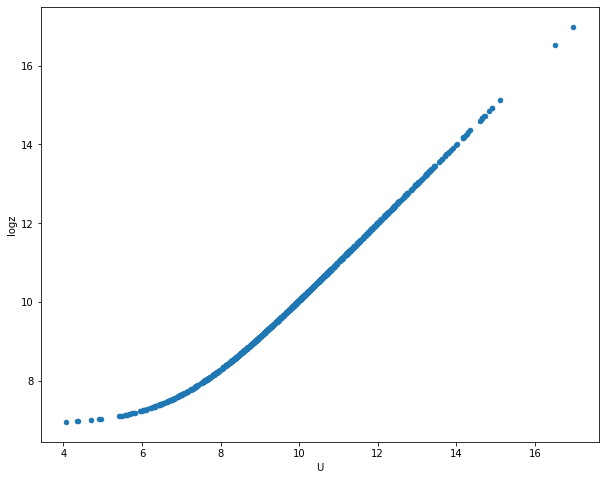

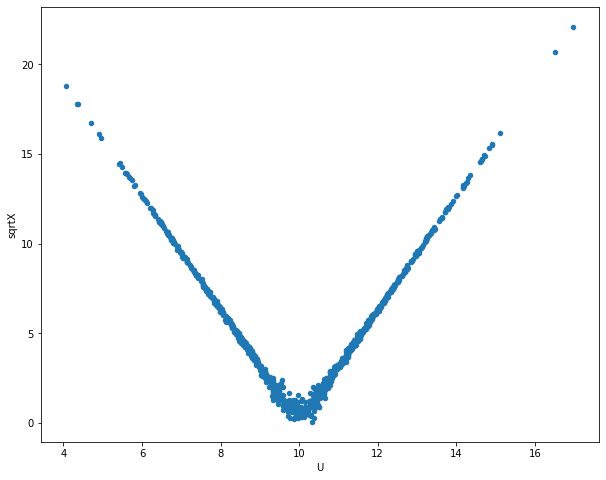

In [16]:
cordf.plot(x = "U", y = "logz", kind = 'scatter')
cordf.plot(x = "U", y = "sqrtX", kind = 'scatter')

# 4.

In [18]:
from sklearn import model_selection, metrics

x = np.arange(1,21,1)
y = [1.3, 2.2, 1.0, 3.1, 2.8, 1.5, 2.1, 2.6, 3.7, 3.5, 3.7, 2.9, 3.7, 4.0, 4.3, 4.7, 4.4, 3.9, 4.8, 4.4]
df = pd.DataFrame({'Data':y},index=x)
df.head()

,Data
1,1.3
2,2.2
3,1.0
4,3.1
5,2.8


In this set of solutions, we will set up the full cross-validation, but will only actually perform the first step of it.  The remaining steps follow in the same way.

In [19]:
kf = model_selection.KFold(n_splits=4,shuffle=True)

set1,set2,set3,set4 = kf.split(df)

In [20]:
set1

(array([ 0,  1,  2,  4,  5,  7,  8,  9, 10, 11, 12, 14, 15, 17, 19]),
 array([ 3,  6, 13, 16, 18]))

In [21]:
df_train1 = df.iloc[set1[0],:]
df_test1 = df.iloc[set1[1],:]

df_train2 = df.iloc[set2[0],:]
df_test2 = df.iloc[set2[1],:]

df_train3 = df.iloc[set3[0],:]
df_test3 = df.iloc[set3[1],:]

df_train4 = df.iloc[set4[0],:]
df_test4 = df.iloc[set4[1],:]

In [22]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(df_train1.index,df_train1['Data'])

train_regr_1 = intercept + slope * df_train1.index

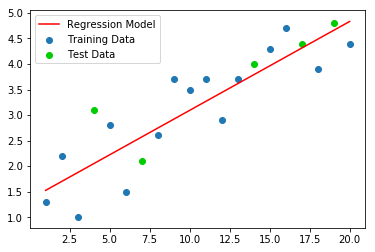

In [23]:
scatter(df_train1.index,df_train1['Data'],label='Training Data')
scatter(df_test1.index,df_test1['Data'],color='#00CC00',label='Test Data')
plt.plot(x,intercept + slope*x, color='red',label='Regression Model')
plt.legend();

We compute the $R^2$ and MAE for the model on the *training set*:

In [24]:
metrics.r2_score(df_train1['Data'], train_regr_1)

0.7654534244699487

In [25]:
metrics.mean_absolute_error(df_train1['Data'], train_regr_1)

0.4924072011878249

Then we compare to the measures for the model on the *test set*:

In [26]:
metrics.r2_score(df_test1['Data'], intercept + slope*df_test1.index)

0.7022026115399549

In [27]:
metrics.mean_absolute_error(df_test1['Data'], intercept + slope*df_test1.index)

0.3931124721603565

So both the $R^2$ and the MAE both saw significant declines from the train to test, so that's not a great initial sign for our cross-validation.  We will need to perform the remaining test/train sets, and compare all of the metrics at the end.

# 5. A.

We are interested in whether the coin is biased, so the *null hypothesis* will be that the coin is *not* biased. To obtain a p-value, we compute the probability of an event at least as extreme as the one that we observed. There is no event *more* extreme than the coin coming up all heads, so we can simply compute the probability of that. For $n$ flips this probability is equal to $\frac{1}{2^n}$. We can plug in some values for $n$ to obtain p-values. Use python!

In [6]:
for n in range(10):
    print("For %i flips, the p-value is %f" % (n, 1/2**n))

For 0 flips, the p-value is 1.000000
For 1 flips, the p-value is 0.500000
For 2 flips, the p-value is 0.250000
For 3 flips, the p-value is 0.125000
For 4 flips, the p-value is 0.062500
For 5 flips, the p-value is 0.031250
For 6 flips, the p-value is 0.015625
For 7 flips, the p-value is 0.007812
For 8 flips, the p-value is 0.003906
For 9 flips, the p-value is 0.001953


We can see that at 5 flips, the p-value is smaller than .05 which is a common threshold that researchers use. Would you personally accept this as "significant" evidence of bias? Why or why not?

# 5.B.



As in problem 1, our null hypothesis is that the coin is unbiased. A precise technical way to say this is that the number of tails is given by a binomial distribution with $p=0.5$ -- or equivalently, that each flip follows a Bernoulli distribution with $p=0.5$.

The alternative hypothesis is that we get a result at least as extreme as the one that we saw. In this case, that would mean that we flip the coin $n$ times and see a proportion of tails $0.48$ or less. That means we have to check the probability of getting $0.48$, the probability of getting $0.47$, the probability of getting $0.46$, and so on all the way down to $0$ (and all the numbers in between that we missed). This is computationally infeasible for even moderately large $n$.

Instead we use the central limit theorem, which tells us that under the null hypothesis the proportion of tails is approximately normal with mean $\frac{1}{2}$ and standard deviation $\frac{1}{2\sqrt{n}}$.

One way to proceed is to create a function that takes $n$ and returns the (one-sided) p-value associated with a proportion of .48. We can investigate this function to learn about the relationship between $n$ and $p$, and try to estimate how big $n$ needs to be for $p$ to be smaller than, say, $0.05$.


In [7]:
from scipy.stats import norm
def p(n):
    return norm.cdf(0.48, loc = 0.5, scale = 1/(2*sqrt(n)))

In [8]:
for i in range(100, 2000, 100):
    print("For n = %i, p = %f" % (i, p(i)))

For n = 100, p = 0.344578
For n = 200, p = 0.285804
For n = 300, p = 0.244211
For n = 400, p = 0.211855
For n = 500, p = 0.185547
For n = 600, p = 0.163593
For n = 700, p = 0.144959
For n = 800, p = 0.128950
For n = 900, p = 0.115070
For n = 1000, p = 0.102952
For n = 1100, p = 0.092312
For n = 1200, p = 0.082928
For n = 1300, p = 0.074620
For n = 1400, p = 0.067240
For n = 1500, p = 0.060668
For n = 1600, p = 0.054799
For n = 1700, p = 0.049549
For n = 1800, p = 0.044843
For n = 1900, p = 0.040618


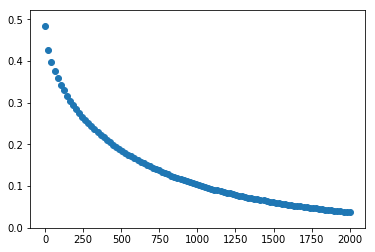

In [9]:
n_values = np.linspace(1, 2000, 100)
p_values = [p(n) for n in n_values]
plt.figure()
plt.scatter(x = n_values, y = p_values);



From the figure, it looks like we get p = 0.05 at just above n = 1600. We can actually solve for an exact value of n that gives p=0.05 (or any alpha we want) by using the inverse cdf function, norm.ppf. We are looking for $n$ that solves $$F(0.48) = 0.05$$, where $F$ is the cdf above. The central limit theorem tells us that $$F(t) = \Phi\left(\frac{t - \frac{1}{2}}{1/(2\sqrt{n})}\right) = \Phi\left(2\sqrt{n}(t-\frac{1}{2})\right)$$ where $\Phi$ is the cdf of the standard normal distribution.

Combining these, we are looking for $n$ that solves
$$\Phi(-0.04\sqrt{n}) = 0.05$$

Applying the inverse cdf $\Phi^{-1}$ and rearranging slightly, we obtain $$n = \left(\frac{\Phi^{-1} (0.05)}{-0.04}\right)^2$$

Using python:

In [10]:
(norm.ppf(0.05)/(-0.04))**2

1690.964658809634

In [11]:
# Note that this agrees with our function p
p(1691)

0.04999822726318246

# 5.C.

In the first case, we had "statistical significance" with a sample size of only 5. In the second, it took almost 1700 samples to call the evidence significant. What was the difference between the two? The important difference is the effect size. In the first case, the effect that we are looking for is very extreme: all the flips coming up the same. This is the most extreme possible outcome. In the second case, the effect size is quite small: only a 2% difference from the unbiased coin. When the effect size that we are looking for is small, it takes a large sample size to detect it with confidence.

People often ask how big of a sample is required for statistical significance. This exercise shows that this question is not fully defined without discussing the expected effect size. If we are expecting a large effect, we can make do with quite a small sample, and vice versa.

<div id="container" style="position:relative;">
<div style="position:relative; float:right"><img style="height:25px""width: 50px" src ="https://drive.google.com/uc?export=view&id=14VoXUJftgptWtdNhtNYVm6cjVmEWpki1" />
</div>
</div>